In [6]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

row_data = pd.read_excel('/Users/liyifan/Desktop/551552/homework/homework2/CCPP/Folds5x2_pp.xlsx')
all_data = np.array(row_data)

B

rows: 9568
columns: 5
5 columns means that 5 different variables, 9568 rows is the number of data of every variable


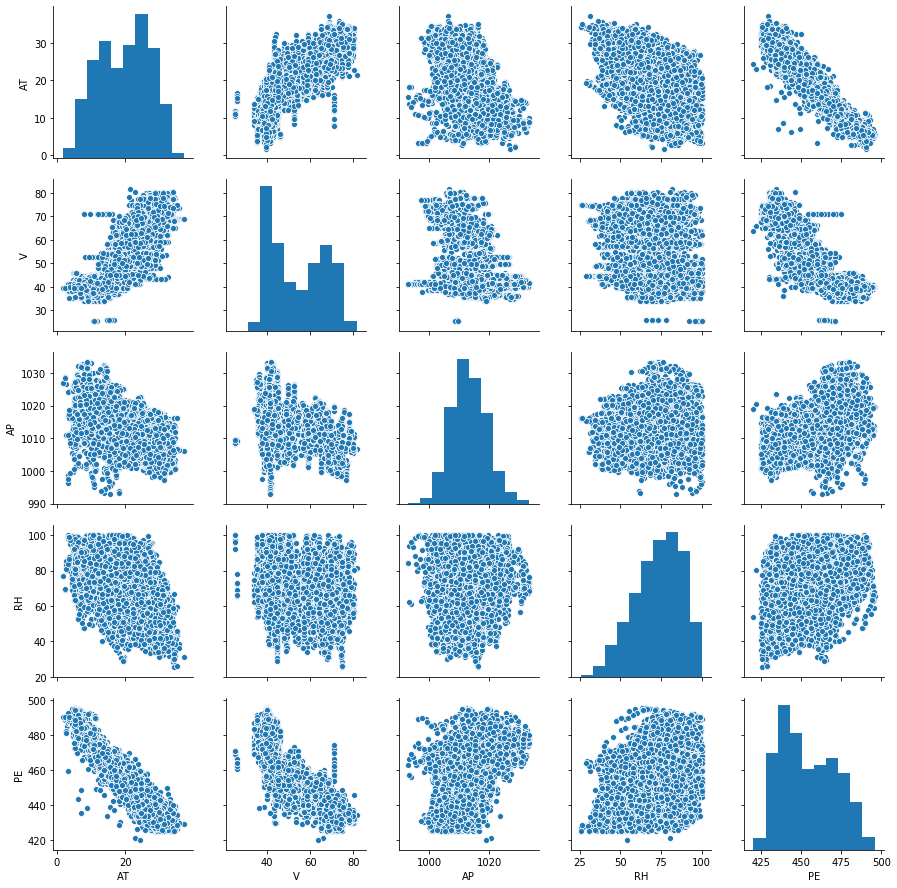

                            AT          V           AP          RH          PE
mean                 19.651231  54.305804  1013.259078   73.308978  454.365009
median               20.345000  52.080000  1012.940000   74.975000  451.550000
min                   1.810000  25.360000   992.890000   25.560000  420.260000
max                  37.110000  81.560000  1033.300000  100.160000  495.760000
range                35.300000  56.200000    40.410000   74.600000   75.500000
first quantile       13.510000  41.740000  1009.100000   63.327500  439.750000
third quantile       25.720000  66.540000  1017.260000   84.830000  468.430000
interquantile range  12.210000  24.800000     8.160000   21.502500   28.680000


In [7]:
all_rows,volumns = all_data.shape
print('rows:',all_rows)
print('columns:',volumns)
print('5 columns means that 5 different variables, 9568 rows is the number of data of every variable')
first_column = all_data[0,:]

'''第二题'''

sns.pairplot(data=row_data)
plt.show()


'''第三题'''



def data_desctibe(x):
    return pd.Series([x.mean(),x.median(),x.min(),x.max(),(x.max()-x.min()),x.quantile(.25),x.quantile(.75),(x.quantile(.75)-x.quantile(.25))],index=['mean',\
                                    'median','min','max','range','first quantile','third quantile','interquantile range'])

print(row_data.apply(data_desctibe))




C

AT is x, EP is y :
y = 497.03411989276674 + -2.1713199585177927 *x
V is x, EP is y :
y = 517.801526308386 + -1.1681351265557127 *x
AP is x, EP is y :
y = -1055.2609889844396 + 1.489871673399114 *x
RH is x, EP is y :
y = 420.96176615548393 + 0.45565010226298003 *x
[-2.1713199585177927, -1.1681351265557127, 1.489871673399114, 0.45565010226298003]


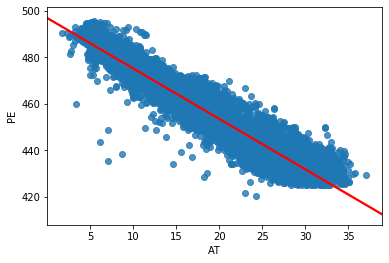

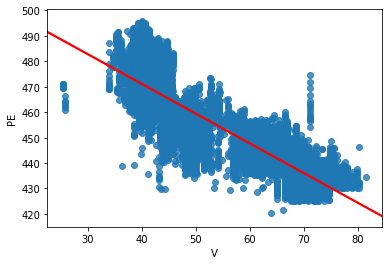

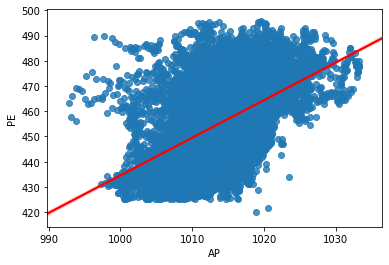

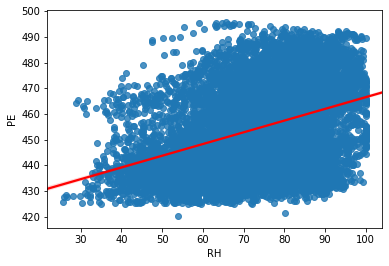

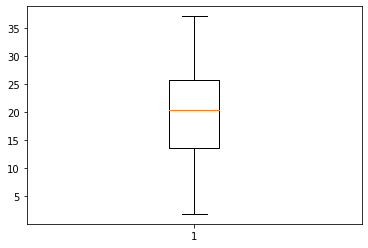

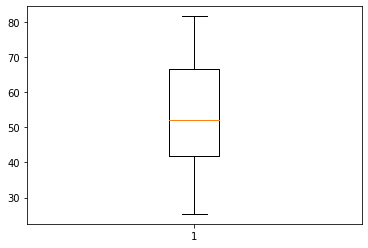

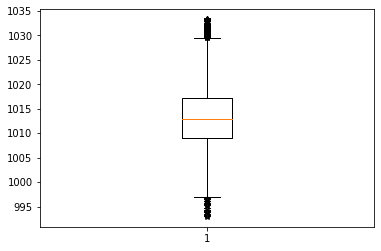

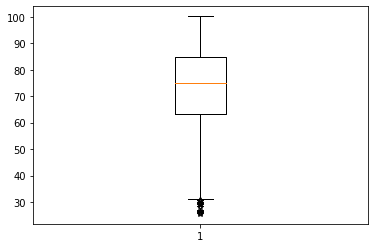

the data which use * to represent are outliers that we would like to remove


In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


row_data = pd.read_excel('/Users/liyifan/Desktop/551552/homework/homework2/CCPP/Folds5x2_pp.xlsx')
all_data = np.array(row_data)


def simple(x):
    find = ['AT','V','AP','RH']
    a = find[x]
    b0 = 0.0
    b1 = 0.0
    X_train = []
    y_train = []
    simple_model = LinearRegression()
    for data1,data2 in zip(row_data[a],row_data['PE']):
        X_train.append([float(data1)])
        y_train.append([float(data2)])
    simple_model.fit(X_train,y_train)
    b0 = float(simple_model.intercept_)
    b1 = float(simple_model.coef_)
    return b0,b1

find = ['AT','V','AP','RH']
per_coef_list = []
for i in range(0,4):
    a, b = simple(i)
    print(find[i],'is x, EP is y :')
    print('y =', a, '+', b, '*x')
    per_coef_list.append(b)

print(per_coef_list)


sns.regplot(data=row_data, x=row_data['AT'], y=row_data['PE'], line_kws={'color':'red'})
plt.show()
sns.regplot(data=row_data, x=row_data['V'], y=row_data['PE'], line_kws={'color':'red'})
plt.show()
sns.regplot(data=row_data, x=row_data['AP'], y=row_data['PE'], line_kws={'color':'red'})
plt.show()
sns.regplot(data=row_data, x=row_data['RH'], y=row_data['PE'], line_kws={'color':'red'})
plt.show()

plt.boxplot(all_data[:,0],sym='*')
plt.show()
plt.boxplot(all_data[:,1],sym='*')
plt.show()
plt.boxplot(all_data[:,2],sym='*')
plt.show()
plt.boxplot(all_data[:,3],sym='*')
plt.show()
print('the data which use * to represent are outliers that we would like to remove')

D

In [9]:
b0 = 0.0
b1 = 0.0
simple_model = LinearRegression()
X_train = all_data[:,:4]
y_train = all_data[:,4]
simple_model.fit(X_train,y_train)
intercept = simple_model.intercept_
coefficient = simple_model.coef_

a1 = float(coefficient[0])
a2 = float(coefficient[1])
a3 = float(coefficient[2])
a4 = float(coefficient[3])

multiple_coef = []
multiple_coef.append(a1)
multiple_coef.append(a2)
multiple_coef.append(a3)
multiple_coef.append(a4)
print('y=',a1,'*AT +',a2,'*V +',a3,'*AP +',a4,'*RH')
print(' ')
print(' ')


X_1 = row_data[['AT','V','AP','RH']]
y_1 = row_data['PE']
X_1 = sm.add_constant(X_1)
reg_model = sm.OLS(y_1,X_1)
reg_model = reg_model.fit()
print(reg_model.summary())

print(' ')
print(' ')
print(' ')
print(' ')
t_AT = reg_model.tvalues['AT']
t_V = reg_model.tvalues['V']
t_AP = reg_model.tvalues['AP']
t_RH = reg_model.tvalues['RH']

print('t_value of t_AT,t_V,t_AP,t_RH is',t_AT,t_V,t_AP,t_RH)

t_statistic = 1.96

if np.abs(t_AT)>1.96:
    print('predictor AT can reject null hypothesis')
if np.abs(t_V)>1.96:
    print('predictor V can reject null hypothesis')
if np.abs(t_AP)>1.96:
    print('predictor AP can reject null hypothesis')
if np.abs(t_RH)>1.96:
    print('predictor RH can reject null hypothesis')






y= -1.9775131066353941 *AT + -0.2339164225824988 *V + 0.062082943780856076 *AP + -0.15805410291641395 *RH
 
 
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:06:03   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


E

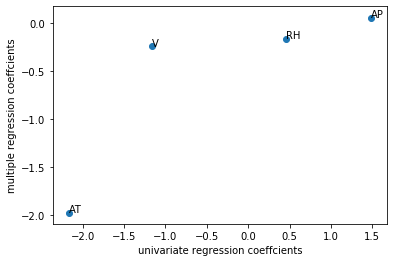

In [10]:
picture_x = per_coef_list
picture_y = multiple_coef

plt.scatter(picture_x,picture_y)
plt.annotate('AT',(picture_x[0],picture_y[0]), xycoords='data')
plt.annotate('V',(picture_x[1],picture_y[1]), xycoords='data')
plt.annotate('AP',(picture_x[2],picture_y[2]), xycoords='data')
plt.annotate('RH',(picture_x[3],picture_y[3]), xycoords='data')
plt.xlabel('univariate regression coeffcients')
plt.ylabel('multiple regression coeffcients')
plt.show()

F

In [11]:

X_train = all_data[:,0]
y_train = all_data[:,4]
X_train_2 = []
X_train_3 = []
X_train_new_1 = []
X_train_new_2 = []
for b in range(0,9568):
    X_train_2.append(np.around(np.square(X_train[b]),2))
for b in range(0,9568):
    X_train_3.append(np.around(np.power(X_train[b],3),2))
X_train_2 = np.array(X_train_2)
X_train_3 = np.array(X_train_3)

X_train_new_1 = np.vstack([X_train, X_train_2])
X_train_new_2 = np.vstack([X_train_new_1, X_train_3])
X_train_new_2 = X_train_new_2.T

X_train_new_2 = sm.add_constant(X_train_new_2)
X_train_new_2 = pd.DataFrame(data=X_train_new_2, columns=['AT0','AT1','AT2','AT3'])


reg_model = sm.OLS(y_train, X_train_new_2)
reg_model = reg_model.fit()
print(reg_model.summary())






X_train = all_data[:,1]
y_train = all_data[:,4]
X_train_2 = []
X_train_3 = []
X_train_new_1 = []
X_train_new_2 = []
for b in range(0,9568):
    X_train_2.append(np.around(np.square(X_train[b]),2))
for b in range(0,9568):
    X_train_3.append(np.around(np.power(X_train[b],3),2))
X_train_2 = np.array(X_train_2)
X_train_3 = np.array(X_train_3)

X_train_new_1 = np.vstack([X_train, X_train_2])
X_train_new_2 = np.vstack([X_train_new_1, X_train_3])
X_train_new_2 = X_train_new_2.T

X_train_new_2 = sm.add_constant(X_train_new_2)
X_train_new_2 = pd.DataFrame(data=X_train_new_2, columns=['V0','V1','V2','V3'])


reg_model = sm.OLS(y_train, X_train_new_2)
reg_model = reg_model.fit()
print(reg_model.summary())






X_train = all_data[:,2]
y_train = all_data[:,4]
X_train_2 = []
X_train_3 = []
X_train_new_1 = []
X_train_new_2 = []
for b in range(0,9568):
    X_train_2.append(np.around(np.square(X_train[b]),2))
for b in range(0,9568):
    X_train_3.append(np.around(np.power(X_train[b],3),2))
X_train_2 = np.array(X_train_2)
X_train_3 = np.array(X_train_3)

X_train_new_1 = np.vstack([X_train, X_train_2])
X_train_new_2 = np.vstack([X_train_new_1, X_train_3])
X_train_new_2 = X_train_new_2.T

X_train_new_2 = sm.add_constant(X_train_new_2)
X_train_new_2 = pd.DataFrame(data=X_train_new_2, columns=['AP0','AP1','AP2','AP3'])


reg_model = sm.OLS(y_train, X_train_new_2)
reg_model = reg_model.fit()
print(reg_model.summary())







X_train = all_data[:,3]
y_train = all_data[:,4]
X_train_2 = []
X_train_3 = []
X_train_new_1 = []
X_train_new_2 = []
for b in range(0,9568):
    X_train_2.append(np.around(np.square(X_train[b]),2))
for b in range(0,9568):
    X_train_3.append(np.around(np.power(X_train[b],3),2))
X_train_2 = np.array(X_train_2)
X_train_3 = np.array(X_train_3)

X_train_new_1 = np.vstack([X_train, X_train_2])
X_train_new_2 = np.vstack([X_train_new_1, X_train_3])
X_train_new_2 = X_train_new_2.T

X_train_new_2 = sm.add_constant(X_train_new_2)
X_train_new_2 = pd.DataFrame(data=X_train_new_2, columns=['RH0','RH1','RH2','RH3'])


reg_model = sm.OLS(y_train, X_train_new_2)
reg_model = reg_model.fit()
print(reg_model.summary())
print(' ')
print('for AT: p-values of all variables are less than 0.05, so it has nonlinear association')
print('for V: p-values of V**3 are less than 0.05, so it has nonlinear association')
print('for AP: p-values of all variables are less than 0.05, so it has nonlinear association')
print('for RH: p-values of all variables are less than 0.05, so it has nonlinear association')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:06:04   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT0          492.7284      0.673    732.242      0.0

G

In [12]:
X_train = all_data[:,:4]
y_train = all_data[:,4]
X_train_AT_V = []
X_train_AT_AP = []
X_train_AT_RH = []
X_train_V_AP = []
X_train_V_RH = []
X_train_AP_RH = []


for b in range(0,9568):
    X_train_AT_V.append((X_train[b,0])*(X_train[b,1]))
    #X_train_AT_AP.append(np.around(((X_train[b,0])*(X_train[b,1])),2)                    #保留两位小数的写法


for b in range(0,9568):
    X_train_AT_AP.append((X_train[b,0])*(X_train[b,2]))

for b in range(0,9568):
    X_train_AT_RH.append((X_train[b,0])*(X_train[b,3]))

for b in range(0,9568):
    X_train_V_AP.append((X_train[b,1])*(X_train[b,2]))

for b in range(0,9568):
    X_train_V_RH.append((X_train[b,1])*(X_train[b,3]))

for b in range(0,9568):
    X_train_AP_RH.append((X_train[b,2])*(X_train[b,3]))



X_train_AT_V = np.array(X_train_AT_V)
X_train_AT_AP = np.array(X_train_AT_AP)
X_train_AT_RH = np.array(X_train_AT_RH)
X_train_V_AP = np.array(X_train_V_AP)
X_train_V_RH = np.array(X_train_V_RH)
X_train_AP_RH = np.array(X_train_AP_RH)


X_train = X_train.T
X_train_new = np.vstack([X_train, X_train_AT_V])
X_train_new = np.vstack([X_train_new, X_train_AT_AP])
X_train_new = np.vstack([X_train_new, X_train_AT_RH])
X_train_new = np.vstack([X_train_new, X_train_V_AP])
X_train_new = np.vstack([X_train_new, X_train_V_RH])
X_train_new = np.vstack([X_train_new, X_train_AP_RH])


X_train_new = X_train_new.T
X_train_new = sm.add_constant(X_train_new)

X_train_new = pd.DataFrame(data=X_train_new, columns=['CONSTANT','AT','V','AP','RH','AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH'])


reg_model = sm.OLS(y_train, X_train_new)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:06:04   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CONSTANT     685.7825     78.640      8.721      0.0

Hi

In [13]:
'''第一题'''

row_data = pd.read_excel('/Users/liyifan/Desktop/551552/homework/homework2/CCPP/Folds5x2_pp.xlsx')
all_data = np.array(row_data)

X_train, X_test, y_train, y_test = train_test_split(all_data[:,:4], all_data[:,4], test_size=0.3, random_state=1)
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
predict_train = model_1.predict(X_train)
predict_test = model_1.predict(X_test)
train_error = mean_squared_error(y_train,predict_train)
test_error = mean_squared_error(y_test,predict_test)
print(train_error,test_error)










20.766119761450934 20.7774781068844


Hii

In [22]:
'''第二小题'''


row_data = pd.read_excel('/Users/liyifan/Desktop/551552/homework/homework2/CCPP/Folds5x2_pp.xlsx')
all_data = np.array(row_data)

X_train_AT2 = []
X_train_V2 = []
X_train_AP2 = []
X_train_RH2 = []

X_train = all_data[:,:4]
y_train = all_data[:,4]

for b in range(0,9568):
    X_train_AT2.append(np.around(np.square(X_train[b,0]),2))
for b in range(0,9568):
    X_train_V2.append(np.around(np.square(X_train[b,1]),2))
for b in range(0, 9568):
    X_train_AP2.append(np.around(np.square(X_train[b,2]), 2))
for b in range(0,9568):
    X_train_RH2.append(np.around(np.square(X_train[b,3]),2))


X_train = X_train.T


X_H_train = np.vstack([X_train, X_train_AT2])
X_H_train = np.vstack([X_H_train, X_train_V2])
X_H_train = np.vstack([X_H_train, X_train_AP2])
X_H_train = np.vstack([X_H_train, X_train_RH2])

X_H_train = np.vstack([X_H_train, X_train_AT_V])
X_H_train = np.vstack([X_H_train, X_train_AT_AP])
X_H_train = np.vstack([X_H_train, X_train_AT_RH])
X_H_train = np.vstack([X_H_train, X_train_V_AP])
X_H_train = np.vstack([X_H_train, X_train_V_RH])
X_H_train = np.vstack([X_H_train, X_train_AP_RH])

X_H_train = X_H_train.T
X_H_train = sm.add_constant(X_H_train)





X_train_new = pd.DataFrame(data=X_H_train, columns=['COUNSTANT','AT','V','AP','RH','AT*2','V*2','AP*2','RH*2','AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH'])


X_train, X_test, y_train, y_test = train_test_split(X_train_new,row_data['PE'],test_size=0.3,random_state=1)

model2 = sm.OLS(y_train, X_train)
model2 = model2.fit()
#print(model2.summary())

a = ['COUNSTANT','AT','V','AP','RH','AT*2','V*2','AP*2','RH*2','AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH']



for i in range(5,len(a)):
    b = a[i]
    p = model2.pvalues[b].item()
    if p>0.05:
        X_train_new.drop([b],axis=1,inplace=True)





X_train, X_test, y_train, y_test = train_test_split(X_train_new,row_data['PE'],test_size=0.3,random_state=1)
model_better = LinearRegression()
model_better.fit(X_train, y_train)

predict_train = model_better.predict(X_train)
predict_test = model_better.predict(X_test)
train_error = mean_squared_error(y_train,predict_train)
test_error = mean_squared_error(y_test,predict_test)

print('train error is:',train_error)
print('test error is:',test_error)

train error is: 18.093229092273646
test error is: 18.263572340113885


I

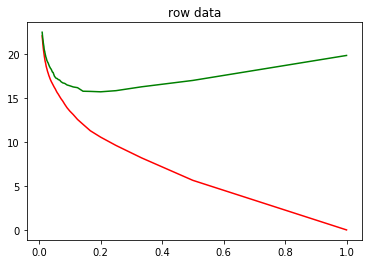

best k is 5 best MSE error is 15.704821203761764


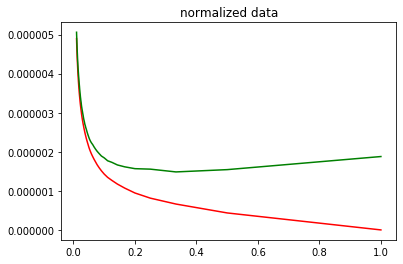

best k is 3 best MSE error is 1.4845598033673994e-06


In [15]:


row_data = pd.read_excel('/Users/liyifan/Desktop/551552/homework/homework2/CCPP/Folds5x2_pp.xlsx')
all_data = np.array(row_data)
X_train, X_test, y_train, y_test = train_test_split(all_data[:,:4],all_data[:,4],test_size=0.3,random_state=1)


another_k_list = []
test_MSE_list = []
train_MSE_list = []
best_k = 0
best_error = 100
for i in range(1,101):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_train = knn.predict(X_train)
    predict_test = knn.predict(X_test)
    MSE_test = mean_squared_error(y_test,predict_test)               #Mean Absolute Error，MAE,用于评估预测结果和真实数据集的接近程度的程度，其值越小说明拟合效果越好。
    MSE_train = mean_squared_error(y_train,predict_train)
    test_MSE_list.append(MSE_test)
    train_MSE_list.append(MSE_train)
    another_k_list.append([1/i])
    if MSE_test<=best_error:
        best_error = MSE_test
        best_k = i

plt.title('row data')
plt.plot(another_k_list,train_MSE_list,color='red')
plt.plot(another_k_list,test_MSE_list,color='green')
plt.show()
print('best k is',best_k,'best MSE error is',best_error)



'''第二题'''
row_data = pd.read_excel('/Users/liyifan/Desktop/551552/homework/homework2/CCPP/Folds5x2_pp.xlsx')
all_data = np.array(row_data)
normalize_data = preprocessing.normalize(all_data)

X_train, X_test, y_train, y_test = train_test_split(normalize_data[:,:4],normalize_data[:,4],test_size=0.3,random_state=1)


another_k_list = []
test_MSE_list = []
train_MSE_list = []
best_k = 0
best_error = 100
for i in range(1,101):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_train = knn.predict(X_train)
    predict_test = knn.predict(X_test)
    MSE_test = mean_squared_error(y_test,predict_test)               #Mean Absolute Error，MAE,用于评估预测结果和真实数据集的接近程度的程度，其值越小说明拟合效果越好。
    MSE_train = mean_squared_error(y_train,predict_train)
    test_MSE_list.append(MSE_test)
    train_MSE_list.append(MSE_train)
    another_k_list.append([1/i])
    if MSE_test<=best_error:
        best_error = MSE_test
        best_k = i


plt.plot(another_k_list,train_MSE_list,color='red')
plt.plot(another_k_list,test_MSE_list,color='green')
plt.title('normalized data')
plt.show()
print('best k is',best_k,'best MSE error is',best_error)

J

In [16]:
print('the best MSE of multiple linear regression is 20.7, the best MSE of KNNregression is 15.7, so KNNregression is better than multiple linear regression in this situation')

the best MSE of multiple linear regression is 20.7, the best MSE of KNNregression is 15.7, so KNNregression is better than multiple linear regression in this situation


ISLR: 2.4.1

1.We only have small number of kinds of parameters, and we have large number of sample, so flexible model can help us get more accurated model and the predict data will be more accurated.

2.When the number of predictors p is extremely large, and the number of observations n is small, flexible model will cause overfitting and can hardly get right predict data. Thus, we should choose inflexible model.

3.Because the relationship between response and predictor is highly non-linear, flexible model is better and can easily reflect the relationship between response and predictor.

4.The variance of the error items means that this part is no helpful for us to build model, if we use flexible model, this part will lead to inaccurated model. Therefore we should use inflexible model.


ISLR: 2.4.7

1.
The euclidean distance between first point and test point is 3.0
The euclidean distance between second point and test point is 2.0
The euclidean distance between third point and test point is 3.1622776601683795
The euclidean distance between fourth point and test point is 2.23606797749979
The euclidean distance between fifth point and test point is 1.4142135623730951
The euclidean distance between sixth point and test point is 1.7320508075688772

2.
When k = 1, the set only get fifth point which is most closed to test point
so the predict consequence is Green

3
When k = 3, the set get 3 points, fifth point, sixth point, and fourth point. The Red is occupied 2/3.
so the predict consequence is Red

4
if the Bayes decision boundary is highly nonlinear, wo hope the best value of k is small.
Because when k is large, the fit model will be overfitting and get highly linearline which cannot match the Bayes decision boundary.



